In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras  # uses TensorFlow backend
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import model_from_json
from tensorflow.keras import optimizers
#
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
#read CSV file as a dataset with pandas
dataset=pd.read_csv("dataset.csv")

In [3]:
dataset.describe

<bound method NDFrame.describe of        info.density   info.volume  info.symmetry.spacegroup_number  \
0          2.763246    408.857471                                2   
1          3.229952   1781.965032                               14   
2          1.557644   1292.643180                                9   
3          1.616139   1245.856916                               14   
4          1.596537   1148.155557                                2   
...             ...           ...                              ...   
20370      0.170101  21165.032290                                1   
20371      0.162440  27194.106450                                1   
20372      0.380963   8088.346461                                1   
20373      0.132949  31431.035640                                1   
20374      0.125827  34794.026090                                1   

       outputs.pbe.bandgap  outputs.pbe.energy_total  
0                 0.632527               -238.661417  
1              

In [4]:
dataset.describe()

,info.density,info.volume,info.symmetry.spacegroup_number,outputs.pbe.bandgap,outputs.pbe.energy_total
count,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000
mean,1.695517,1878.529287,19.147877,2.087369,-758.155602
std,0.646335,2365.395924,36.811554,1.131588,468.324309
min,0.087070,170.866767,1.000000,0.000131,-3449.382161
25%,1.335527,791.222381,2.000000,1.088290,-908.198745
50%,1.698561,1140.413002,9.000000,2.143179,-634.511489
75%,2.063292,2063.547768,15.000000,2.887478,-451.999601
max,5.436020,49206.400520,230.000000,6.445777,-110.014150


In [5]:
dataset

,info.density,info.volume,info.symmetry.spacegroup_number,outputs.pbe.bandgap,outputs.pbe.energy_total
0,2.763246,408.857471,2,0.632527,-238.661417
1,3.229952,1781.965032,14,1.134232,-672.046744
2,1.557644,1292.643180,9,0.345448,-759.996078
3,1.616139,1245.856916,14,0.342645,-760.103362
4,1.596537,1148.155557,2,1.973007,-700.817715
...,...,...,...,...,...
20370,0.170101,21165.032290,1,2.692705,-1214.792949
20371,0.162440,27194.106450,1,3.326284,-1456.386598
20372,0.380963,8088.346461,1,3.383629,-913.083401
20373,0.132949,31431.035640,1,0.660589,-1512.607322


In [6]:
dataset.shape

(20375, 5)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20375 entries, 0 to 20374
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   info.density                     20375 non-null  float64
 1   info.volume                      20375 non-null  float64
 2   info.symmetry.spacegroup_number  20375 non-null  int64  
 3   outputs.pbe.bandgap              20375 non-null  float64
 4   outputs.pbe.energy_total         20375 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 796.0 KB


In [8]:
dataset.corr()

,info.density,info.volume,info.symmetry.spacegroup_number,outputs.pbe.bandgap,outputs.pbe.energy_total
info.density,1.000000,-0.542891,-0.087174,0.195002,0.376221
info.volume,-0.542891,1.000000,0.170474,-0.068592,-0.579868
info.symmetry.spacegroup_number,-0.087174,0.170474,1.000000,0.027629,-0.238171
outputs.pbe.bandgap,0.195002,-0.068592,0.027629,1.000000,0.075009
outputs.pbe.energy_total,0.376221,-0.579868,-0.238171,0.075009,1.000000


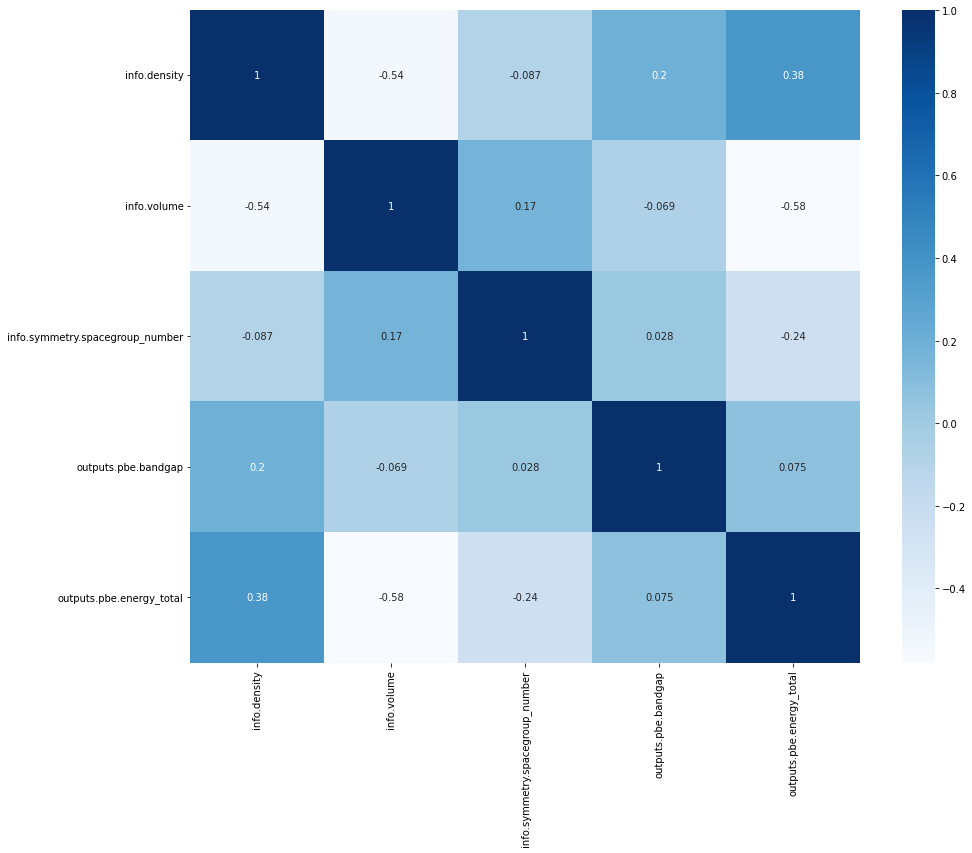

In [9]:
plt.figure(figsize = (15, 12))
sns.heatmap(dataset.corr(), annot = True, cmap = "Blues")
plt.show()

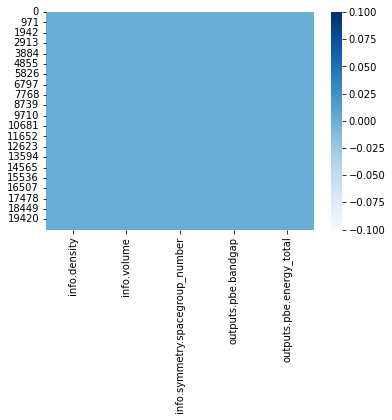

In [10]:
# Check for null values
sns.heatmap(dataset.isnull(), cmap = "Blues")

In [11]:
dataset.isnull().sum()

info.density                       0
info.volume                        0
info.symmetry.spacegroup_number    0
outputs.pbe.bandgap                0
outputs.pbe.energy_total           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3ef4e4610>,
      dtype=object)

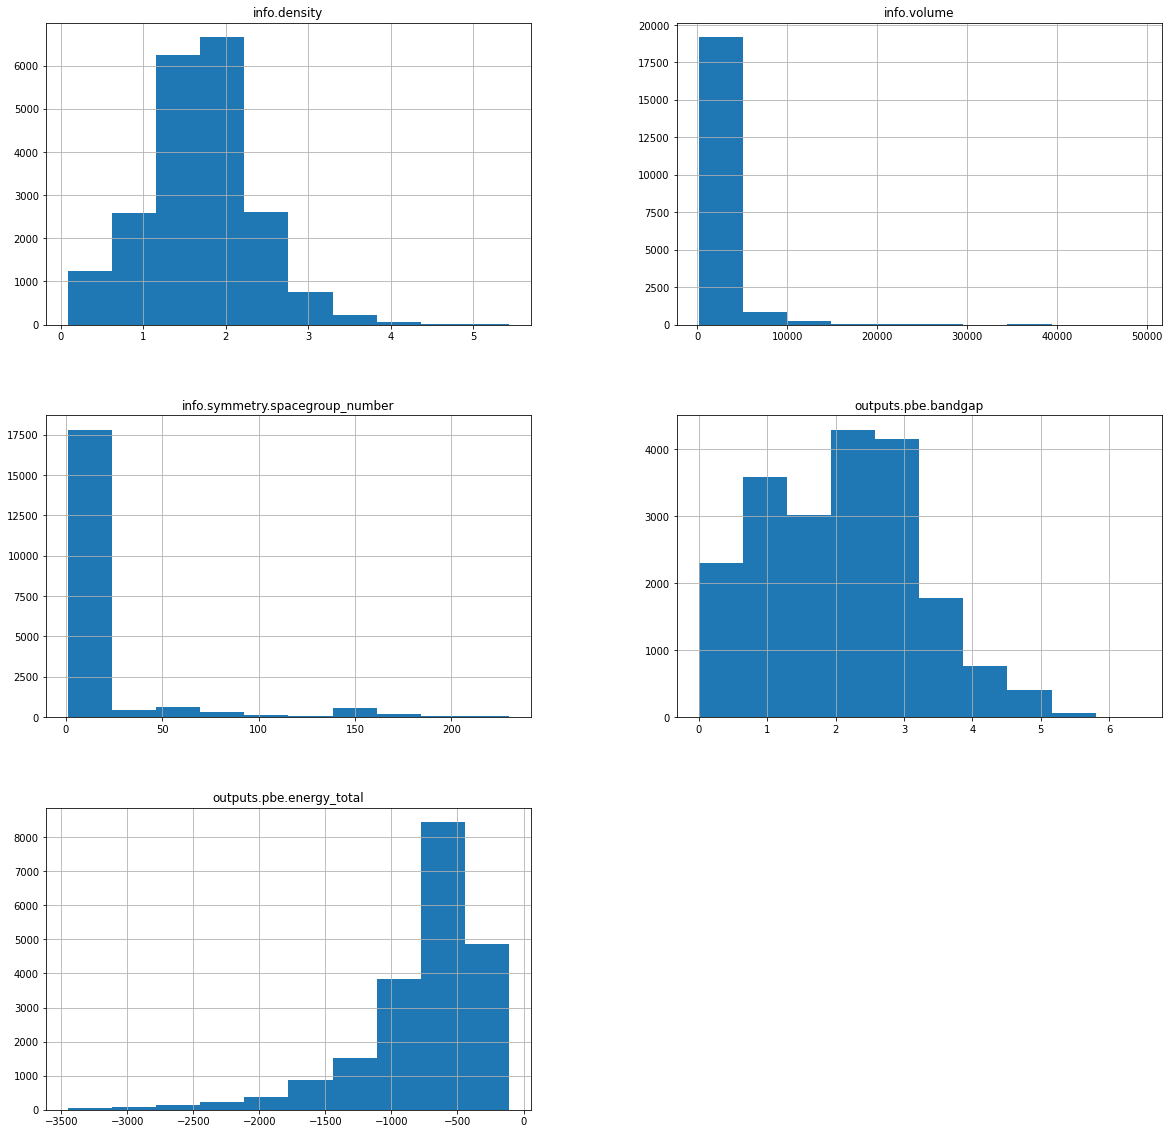

In [12]:
# Display all columns in histogram format
dataset.hist(figsize = (20,20))

In [13]:
# Checking duplicates
duplicates = dataset[dataset.duplicated()]
print("Duplicates: ", len(duplicates))
duplicates

Duplicates:  0


,info.density,info.volume,info.symmetry.spacegroup_number,outputs.pbe.bandgap,outputs.pbe.energy_total


In [14]:
dataset.shape

(20375, 5)

In [15]:
#Train-test split

In [16]:
# input
x = dataset.drop(['outputs.pbe.bandgap', 'outputs.pbe.energy_total'], axis=1)

# output
y = dataset.drop(['info.density',	'info.volume', 'info.symmetry.spacegroup_number'], axis=1)

# Split data into 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
y.shape

(20375, 2)

In [18]:
##Feature Scaling using MinMaxScalar

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
print(x_train)

[[0.18271247 0.05253759 0.00436681]
 [0.16097213 0.03117488 0.        ]
 [0.36791619 0.00939682 0.08296943]
 ...
 [0.31619333 0.01876776 0.00436681]
 [0.33690781 0.01751383 0.05676856]
 [0.29319375 0.01283635 0.05676856]]


In [21]:
print(x_test )

[[0.25916212 0.10452727 0.05676856]
 [0.38986593 0.01985489 0.12227074]
 [0.27241946 0.00365334 0.04803493]
 ...
 [0.26814563 0.01081633 0.00436681]
 [0.24653195 0.01514315 0.        ]
 [0.32237588 0.02348259 0.06113537]]


In [22]:
#Tabular to image data

In [23]:
!pip -q install git+https://github.com/alok-ai-lab/pyDeepInsight.git#egg=pyDeepInsight

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 890.2/890.2 MB 73.5 MB/s eta 0:00:01tcmalloc: large alloc 1112801280 bytes == 0x55948d49a000 @  0x7fe9b7bff615 0x55945648a1cc 0x55945655be17 0x55945648adb4 0x5594564a7dd4 0x5594564a81ad 0x55945651a8f1 0x55945645eea2 0x5594564a5370 0x5594564a80d8 0x55945651a8f1 0x55945645eea2 0x5594564a5370 0x5594564a80d8 0x55945651a8f1 0x55945645eea2 0x5594564a5370 0x5594564a80d8 0x55945651a8f1 0x55945645eea2 0x5594564a5370 0x5594564a80d8 0x55945651a8f1 0x55945645eea2 0x5594564a5370 0x5594564a80d8 0x55945651a8f1 0x5594564

In [24]:
!git clone https://github.com/zhuyitan/IGTD.git

fatal: destination path 'IGTD' already exists and is not an empty directory.


In [25]:
!git clone https://github.com/zhuyitan/IGTD.git

fatal: destination path 'IGTD' already exists and is not an empty directory.


In [26]:
cd IGTD

/content/IGTD


In [27]:
!pip install conda env export > environment.yaml

In [28]:
cd ..

/content


In [29]:
!pip install conda -q python_env ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.8/793.8 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.0/424.0 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.8/382.8 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [30]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.7 MB/s eta 0:00:00


In [31]:
!pip install -q condacolab

In [32]:
import condacolab

In [33]:
condacolab.install

✨🍰✨ Everything looks OK!


In [37]:
condacolab.check()

✨🍰✨ Everything looks OK!


In [39]:
cd IGTD/Scripts

/content/IGTD/Scripts


In [ ]:
!conda env update -n base -f environment.yml

In [ ]:
!conda env create -f environment.yml

In [52]:
!conda activate base


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [51]:
!conda init bash

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
modified      /root/.bashrc

==> For changes to take effect, close and re-open your current shell. <==



In [54]:
!conda activate


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [55]:
! conda env list

# conda environments:
#
base                     /usr/local
IGTD                     /usr/local/envs/IGTD



In [56]:
! activate IGTD

In [58]:
import os
from IGTD_Functions import min_max_transform, table_to_image

In [73]:
import pandas as pd
import os
import numpy as np
from IGTD_Functions import min_max_transform, table_to_image



num_row = 30    # Number of pixel rows in image representation
num_col = 30    # Number of pixel columns in image representation
num = num_row * num_col # Number of features to be included for analysis, which is also the total number of pixels in image representation
save_image_size = 3 # Size of pictures (in inches) saved during the execution of IGTD algorithm.
max_step = 10000    # The maximum number of iterations to run the IGTD algorithm, if it does not converge.
val_step = 300  # The number of iterations for determining algorithm convergence. If the error reduction rate
                # is smaller than a pre-set threshold for val_step itertions, the algorithm converges.

# Import the example data and linearly scale each feature so that its minimum and maximum values are 0 and 1, respectively.
data = pd.read_csv('dataset.csv', low_memory=False, sep='\t', engine='c', na_values=['na', '-', ''], 
                header=0, index_col=0)
data = dataset.iloc[:, :num]
norm_data = min_max_transform(data.values)
norm_data = pd.DataFrame(norm_data, columns=data.columns, index=data.index)

# Run the IGTD algorithm using (1) the Euclidean distance for calculating pairwise feature distances and pariwise pixel
# distances and (2) the absolute function for evaluating the difference between the feature distance ranking matrix and
# the pixel distance ranking matrix. Save the result in Test_1 folder.
fea_dist_method = 'Euclidean'
image_dist_method = 'Euclidean'
error = 'abs'
result_dir = '../tes1'
os.makedirs(name=result_dir, exist_ok=True)
table_to_image(norm_data, [num_row, num_col], fea_dist_method, image_dist_method, save_image_size, max_step, val_step, result_dir, error)

# Run the IGTD algorithm using (1) the Pearson correlation coefficient for calculating pairwise feature distances,
# (2) the Manhattan distance for calculating pariwise pixel distances, and (3) the square function for evaluating
# the difference between the feature distance ranking matrix and the pixel distance ranking matrix.
# Save the result in Test_2 folder.
fea_dist_method = 'Pearson'
image_dist_method = 'Manhattan'
error = 'squared'
result_dir = '../test2'
os.makedirs(name=result_dir, exist_ok=True)
table_to_image(norm_data, [num_row, num_col], fea_dist_method, image_dist_method, save_image_size,
               max_step, val_step, result_dir, error)

ValueError: ignored

In [34]:
# Display the first image in training data

IndexError: ignored

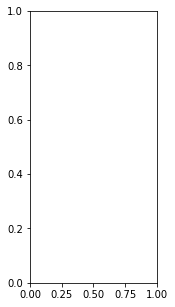

In [35]:
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_text[0]))


In [ ]:
# convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1
x_train = x_train.reshape(-1, 28,28, 1) # input to CNN
x_test = x_test.reshape(-1, 28,28, 1) # labels, the correct output from CNN
x_train.shape, x_test.shape

In [ ]:
# Convert to float32 & rescale the pixel values in range 0 - 1 inclusive
x_train = x_train.astype('float32')
x_test = x_train.astype('float32')
x_train = x_train / 255.
x_test = x_test / 255.

In [ ]:
print(x_train.shape, ' ', x_test.shape, ' ',type(x_train), ' ',type(x_test))

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

In [ ]:
!pip -q install git+https://github.com/alok-ai-lab/pyDeepInsight.git#egg=pyDeepInsight